# Practice Project no 1

Problem Statement:
The dataset is related to red and white variants of the Portuguese "Vinho Verde" wine. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

This dataset can be viewed as classification task. The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.

In [2]:
import pandas as pd
import numpy as np

In [3]:
#uploading the dataframe
df=pd.read_csv("redwinequality.csv")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [4]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [6]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

our target column is "quality"

In [7]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [8]:
df.shape

(1599, 12)

# Check the Null values

In [9]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

We have found that there is no any null values in dataset

In [10]:
#describig the dataset
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


While Analysing the dataset, I found major issues in the features except pH , density & alcohol but maybe there is skewness.

'max' of fixed acidity is high becuase its 'min' is 4.60 , 25% is 7.10, 50% is 7.90, 75% is 9.20 and according to these it's 'max' should be between 10 to 11 but it has 15.90 means and maybe there is skewness.

'max' of volatile acidity is high becuase its 'min' is 0.12 , 25% is 0.39, 50% is 0.52, 75% is 0.62 and according to these it's 'max' should be between 0.75 to 0.80 but it has 1.58 means high and maybe there is skewness.

citric acid has min 0 values and which is not acceptable.

'max' of fixed residual is very high becuase it's 'min' is .09 & 50% is 2.20 and according to these it's 'max' should be between 4.5 to 5.5 but it has 15.50 means too high and not acceptable.

'max' of chlorides is high becuase its 'min' is 0.12 , 25% is 0.70, 50% is 0.79, 75% is 0.90 and according to these it's 'max' should be between 0.10 to 0.105 but it has 0.611 means too high and not acceptable.

'max' of free sulfer dioxide feature is very high becuase it's 'min' is 1 & 50% is 14 according to these it's 'max' should be between 28 to 30 but it has 72 means too high and not acceptable.

'max' of total sulfer dioxide feature is very high becuase it's 'min' is 6 & 50% is 38 according to these it's 'max' should be between 75 to 80 but it has 289 means too high and not acceptable.

'max' of sulphates feature is high becuase it's 'min' is 0.33 & 50% is 0.62 according to these it's 'max' should be between 0.85 to 80 but it has 2.0 means too high and not acceptable.

# Dealing with the zero'0'

In [11]:
# Check the index where 'citric acid' feature has '0 values'

index = np.where(df["citric acid"] == 0)
index

(array([   0,    1,    4,    5,    7,   12,   28,   29,   31,   35,   77,
          96,  122,  123,  126,  127,  142,  144,  158,  178,  235,  236,
         237,  238,  245,  249,  251,  254,  257,  266,  345,  349,  351,
         352,  419,  602,  612,  624,  625,  635,  690,  712,  719,  737,
         739,  742,  757,  758,  762,  775,  780,  793,  802,  818,  820,
         821,  841,  876,  881,  888,  907,  985,  996,  997,  999, 1013,
        1025, 1027, 1030, 1032, 1040, 1045, 1046, 1110, 1119, 1121, 1122,
        1124, 1127, 1130, 1154, 1171, 1175, 1177, 1178, 1191, 1193, 1228,
        1236, 1238, 1239, 1252, 1253, 1258, 1259, 1261, 1263, 1272, 1277,
        1282, 1290, 1293, 1295, 1296, 1298, 1299, 1300, 1316, 1321, 1334,
        1336, 1337, 1338, 1349, 1369, 1374, 1390, 1399, 1407, 1409, 1410,
        1415, 1422, 1428, 1432, 1438, 1447, 1455, 1461, 1550, 1551, 1553],
       dtype=int64),)

In [12]:
# Dealing with '0' values which are available in the 'citric acid' feature

df["citric acid"] = df["citric acid"].replace(0,df["citric acid"].mean())

index = np.where(df == 0)
index

(array([], dtype=int64), array([], dtype=int64))

In [13]:
index = np.where(df["citric acid"] == 0)
index

(array([], dtype=int64),)

Now it seems that there is no any feature has '0' value. So let's continue

# Outliers checking

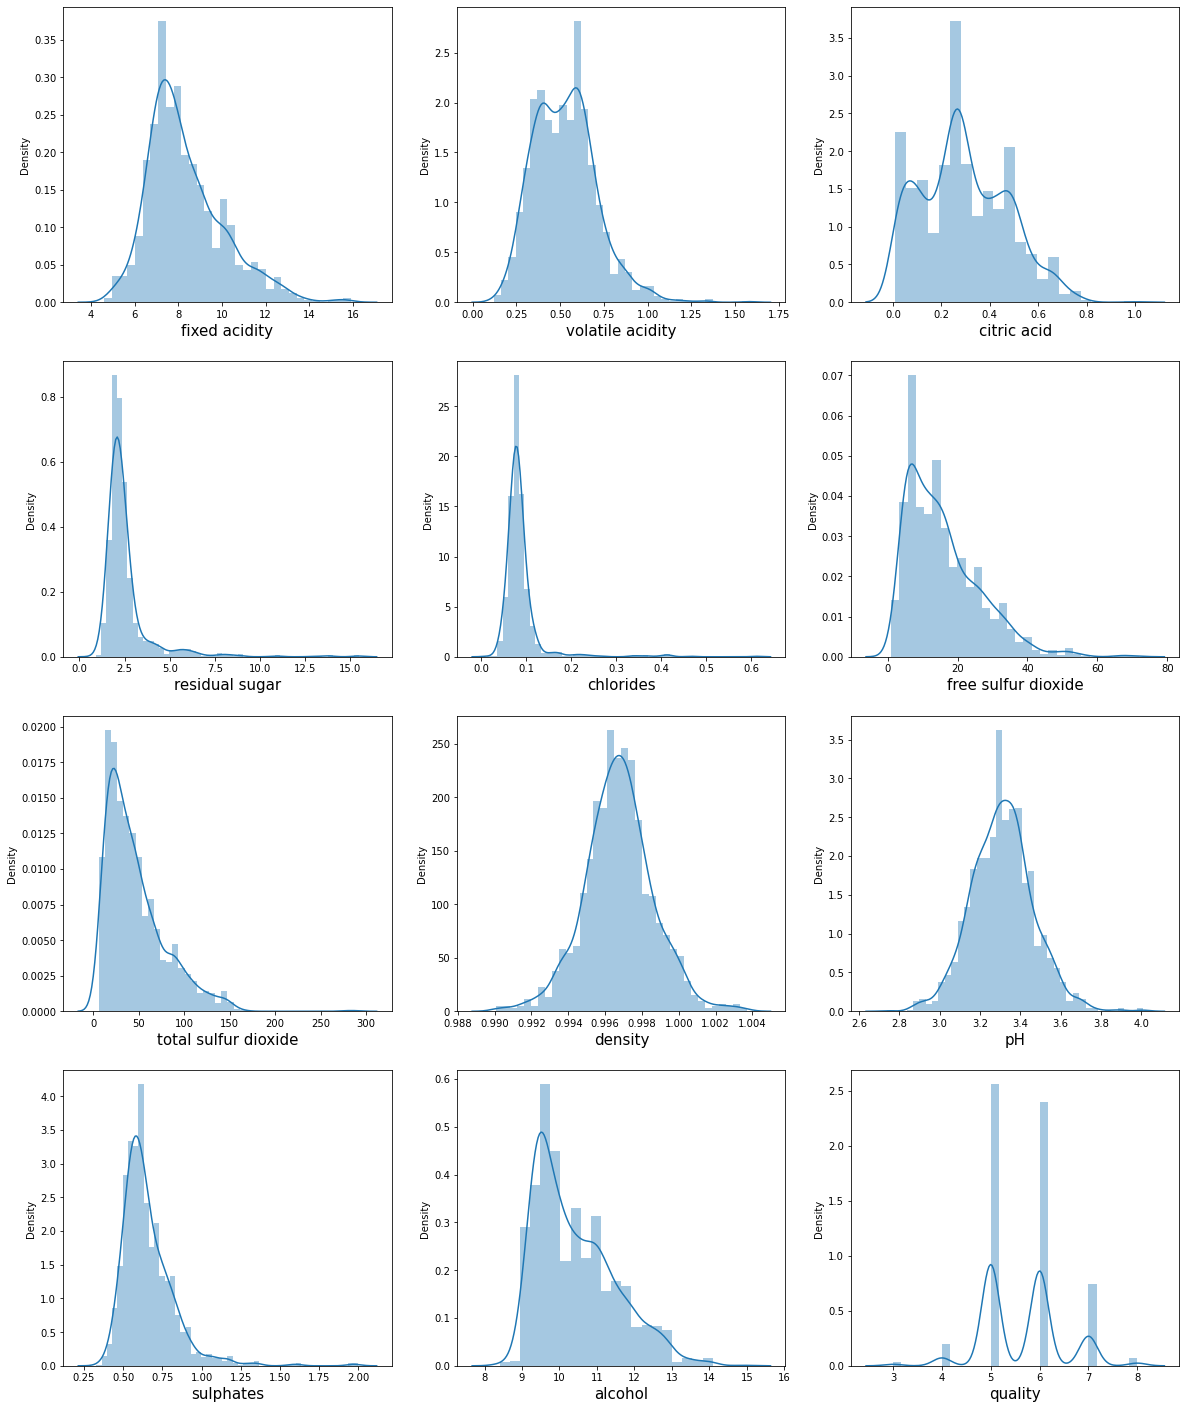

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize = (20,25), facecolor = 'white')
graphplot = 1
for column in df:
    if graphplot <= 12:
        ax = plt.subplot(4,3,graphplot)
        sns.distplot(df[column])
        plt.xlabel(column, fontsize = 15)
    graphplot+=1
plt.show()

In [15]:
#visualaizing the skewness
df.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.338008
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64

By considerning the skewness range between -0.5 to + 0.5. Lets fix it

# Removing Outliers

In [16]:
features=["fixed acidity",'volatile acidity','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','sulphates','alcohol']

In [17]:
#import power transforme technique to remove the outliers
from sklearn.preprocessing import PowerTransformer

In [18]:
pow_trans=PowerTransformer(method= 'yeo-johnson')

In [19]:
df[features] = pow_trans.fit_transform(df[features].values)

In [20]:
df.skew()

fixed acidity           0.002529
volatile acidity        0.003099
citric acid             0.338008
residual sugar         -0.015715
chlorides              -0.151304
free sulfur dioxide    -0.009948
total sulfur dioxide   -0.003752
density                 0.071288
pH                      0.193683
sulphates               0.009985
alcohol                 0.112372
quality                 0.217802
dtype: float64

Now we are observing the features are in range between -0.5 to +0.5 so the outliers are adjusted

# Analysing the Target columns

In [21]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

Means there is total 6 unique values in our target columns

In [22]:
df["quality"].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

# Univariate Analysis

<AxesSubplot:xlabel='quality', ylabel='count'>

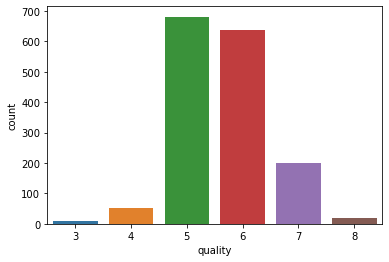

In [23]:
sns.countplot(df["quality"])

There are too difference between classes may be there is imbalance issues so lets try to fix it

# Oversampling

In [24]:
x=df.drop("quality",axis=1)
y=df['quality']

In [25]:
!pip install imblearn
from imblearn.over_sampling import SMOTE
sm=SMOTE()
x,y=sm.fit_resample(x,y)
y.value_counts()

5    681
6    681
7    681
4    681
8    681
3    681
Name: quality, dtype: int64

Now all the data are balanced as we have seen above

# Visualise the correlation

In [26]:
#Analysize the correlation between input(features)and labels
x.corrwith(y)

fixed acidity           0.128409
volatile acidity       -0.677462
citric acid             0.372041
residual sugar          0.020351
chlorides              -0.369840
free sulfur dioxide     0.116780
total sulfur dioxide    0.069879
density                -0.337710
pH                     -0.301893
sulphates               0.577644
alcohol                 0.591932
dtype: float64

In [27]:
# Analyzing by ploting the graph

<AxesSubplot:title={'center':'correlation with quality'}>

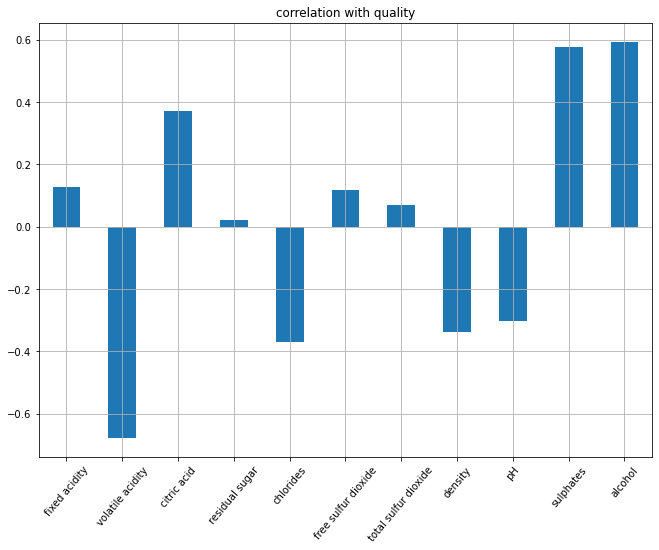

In [28]:
x.corrwith(y).plot(kind='bar',grid=True,figsize=(11,8),rot=50,title="correlation with quality")

By above graph we can observe that 'volatile acidity','sulphates','alcohol' and chlorides are highly correleated with quality

# Visualising the correlation between the features (Multicollinearity Checking)

In [29]:
corr = df.corr()
corr.shape

(12, 12)

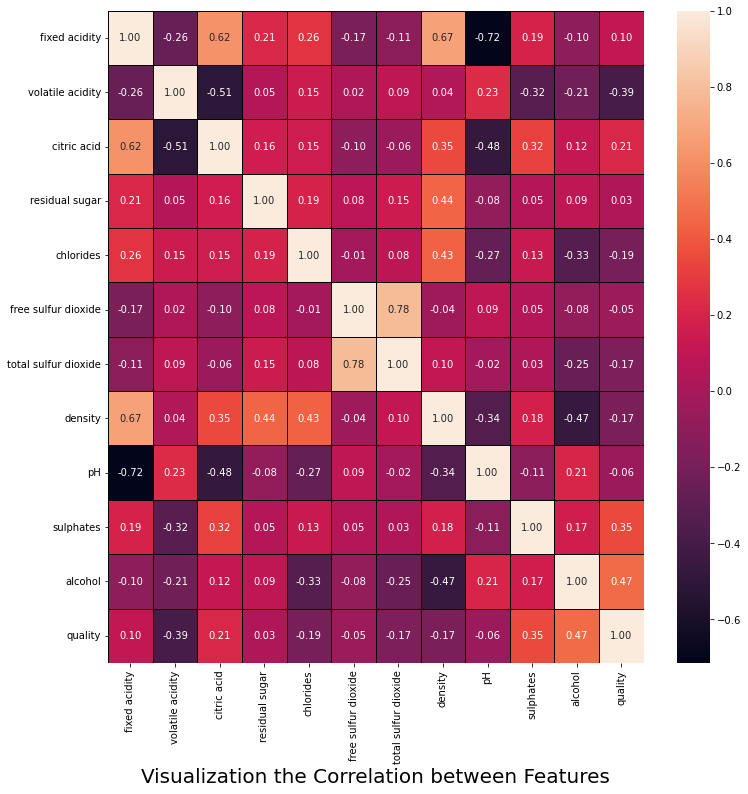

In [30]:
plt.figure(figsize=(12,12))
sns.heatmap(corr,annot=True,linewidth=0.6,linecolor="black",fmt='0.2f')
plt.xlabel("Visualization the Correlation between Features", fontsize=20)
plt.show()

There is no any multicolinierty between the features

# Now the preprocessing part is completed, Now I am going to build my Classification models

# MODEAL BUILDING START:------>

In [31]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import roc_curve,roc_auc_score,plot_roc_curve,accuracy_score,classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Finding best random state

In [32]:
x=df.iloc[:,0:-1]
y=df.iloc[:,-1]

In [33]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [35]:
aucMAX = 0
stateMAX = 0

for i in range(1,200):
    x_scaled_train, x_scaled_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.25, random_state = i)
    testing = RandomForestClassifier()
    testing.fit(x_scaled_train, y_train)
    y_pred = testing.predict(x_scaled_test)
    test_score = accuracy_score(y_test, y_pred)
    if test_score > aucMAX:
        aucMAX = test_score
        stateMAX = i

print("Best Random State is : ",stateMAX)

Best Random State is :  3


# let's find ROC AUC Curve

In [36]:
x_scaled_train, x_scaled_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.25, random_state = stateMAX)

In [37]:
# Decision Tree Classifier    
    
DTC = DecisionTreeClassifier()
DTC.fit(x_scaled_train, y_train)
y_pred = DTC.predict_proba(x_scaled_test)
dtc = roc_auc_score(y_test, y_pred, multi_class = 'ovr', average = 'weighted')

In [38]:
# Gradient Boosting Classifier

GBC = GradientBoostingClassifier()
GBC.fit(x_scaled_train, y_train)
y_pred = GBC.predict_proba(x_scaled_test)
gbc = roc_auc_score(y_test, y_pred, multi_class = 'ovr', average = 'weighted')

In [39]:
# Random Forest Classifier    
    
RFC = RandomForestClassifier()
RFC.fit(x_scaled_train, y_train)
y_pred = RFC.predict_proba(x_scaled_test)
rfc = roc_auc_score(y_test, y_pred, multi_class = 'ovr', average = 'weighted')

In [40]:
# K-Neibhours Classifier

KNC = KNeighborsClassifier()
KNC.fit(x_scaled_train, y_train)
y_pred = KNC.predict_proba(x_scaled_test)
knc = roc_auc_score(y_test, y_pred, multi_class = 'ovr', average = 'weighted')

In [41]:
print("Random Forest Classifier roc_auc_score is : ",rfc)
print("Decision Tree Classifier roc_auc_score is : ",dtc)
print("Gradient Boosting Classifier roc_auc_score is : ",gbc)
print("K-Neighbors Classifier Best roc_auc_score is : ",knc)

Random Forest Classifier roc_auc_score is :  0.8814896415085995
Decision Tree Classifier roc_auc_score is :  0.7075154038368268
Gradient Boosting Classifier roc_auc_score is :  0.8232931492298539
K-Neighbors Classifier Best roc_auc_score is :  0.7517173236549775


In [42]:
# Cross Validation Scores...

rcvs = cross_val_score(RFC,x_scaled,y,cv=5,scoring='roc_auc_ovr_weighted').mean()
dcvs = cross_val_score(DTC,x_scaled,y,cv=5, scoring = 'roc_auc_ovr_weighted').mean()
gcvs = cross_val_score(GBC,x_scaled,y,cv=5,scoring = 'roc_auc_ovr_weighted').mean()
kcvs = cross_val_score(KNC,x_scaled,y,cv=5, scoring = 'roc_auc_ovr_weighted').mean()

print("Cross Validation Score of Random Forest Classifier is : ",rcvs)
print("Cross Validation Score of Decision Tree Classifier is : ",dcvs)
print("Cross Validation Score of Gradient Boosting Classifier is : ",gcvs)
print("Cross Validation Score of K-Neighbors Classifier is : ",kcvs)

Cross Validation Score of Random Forest Classifier is :  0.7395309545472887
Cross Validation Score of Decision Tree Classifier is :  0.5937804788831185
Cross Validation Score of Gradient Boosting Classifier is :  0.7296872668323314
Cross Validation Score of K-Neighbors Classifier is :  0.6751813520644643


# The difference between roc_auc_score & cross validation score

In [43]:
# Average Score after cross validation technique


print("Random Forest Classifier Difference after Cross Validation : ",(rfc - rcvs))
print("Decision Tree Classifier Difference after Cross Validation : ",(dtc - dcvs))
print("Gradient Boosting Classifier Difference after Cross Validation : ",(gbc - gcvs))
print("K-Neighbors Classifier Difference after Cross Validation : ",(knc - kcvs))

Random Forest Classifier Difference after Cross Validation :  0.14195868696131086
Decision Tree Classifier Difference after Cross Validation :  0.1137349249537083
Gradient Boosting Classifier Difference after Cross Validation :  0.09360588239752243
K-Neighbors Classifier Difference after Cross Validation :  0.07653597159051317


After applying the cross_val_score, the difference between accuracy_score and cross_val_score are given above. And you can find that the K-Neighbors Classifier has minimum difference between them than others models. So, I choose the K-Neighbors Classifier as the best model for this dataset.

# Hyper Parameter Tuning with KNearestNeighborsClassifier.

In [44]:
from sklearn.model_selection import GridSearchCV

In [45]:
knn = KNeighborsClassifier()
param_grid = {'n_neighbors': [1, 3, 5, 7, 9], 'weights': ['uniform', 'distance']}
grid_search = GridSearchCV(knn, param_grid, cv=5)
grid_search.fit(x_scaled_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 3, 5, 7, 9],
                         'weights': ['uniform', 'distance']})

In [46]:
gridsearch = GridSearchCV(KNC, param_grid=param_grid)

In [47]:
gridsearch.fit(x_scaled_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 3, 5, 7, 9],
                         'weights': ['uniform', 'distance']})

In [48]:
gridsearch.best_params_

{'n_neighbors': 7, 'weights': 'distance'}

In [49]:
Final_Model =KNeighborsClassifier(n_neighbors = 9, weights='distance')
Final_Model.fit(x_scaled_train, y_train)
y_pred = Final_Model.predict_proba(x_scaled_test)
final_score = roc_auc_score(y_test,y_pred,multi_class = 'ovr',average = 'weighted')
final_score

0.870514565689995

# Saving The Model

In [50]:
import joblib

joblib.dump(Final_Model, "Final Model.pkl")

['Final Model.pkl']

# Loading The Model

In [51]:
Load = joblib.load("Final Model.pkl")
Load.predict(x_scaled)

array([5, 5, 5, ..., 6, 6, 7], dtype=int64)

# End of the Project